In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cab = pd.read_csv('data/Cab_Data.csv')
customers = pd.read_csv('data/Customer_ID.csv')
transactions = pd.read_csv('data/Transaction_ID.csv')
cities = pd.read_csv('data/City.csv')

In [14]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], format='%d-%m-%Y')

In [15]:
cab['Date of Travel']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [16]:
for col in cab.columns:
    if ' ' in col:
        cab = cab.rename(columns={col:col.replace(' ', '_')})
for col in customers.columns:
    if ' ' in col:
        customers = customers.rename(columns={col:col.replace(' ', '_')})
for col in transactions.columns:
    if ' ' in col:
        transactions = transactions.rename(columns={col:col.replace(' ', '_')})

In [17]:
cab.Date_of_Travel.nunique()

1095

In [18]:
cab.groupby('Date_of_Travel').Transaction_ID.count().sort_values(ascending=False).head(10)

Date_of_Travel
2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
2018-12-22    1084
2018-12-14    1076
2017-12-22    1042
2018-11-24    1037
2018-01-06    1032
Name: Transaction_ID, dtype: int64

In [19]:
months=[]
years =[]
for i in range(len(cab['Date_of_Travel'])):
    months.append(cab['Date_of_Travel'][i].month)
    years.append(cab['Date_of_Travel'][i].year)
cab['Month'] = months
cab['Year'] = years

In [20]:
cab = cab.drop(['Date_of_Travel'], axis=1)
cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [21]:
plot2 = cab.groupby(['Month']).Transaction_ID.count()
plot2

Month
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64

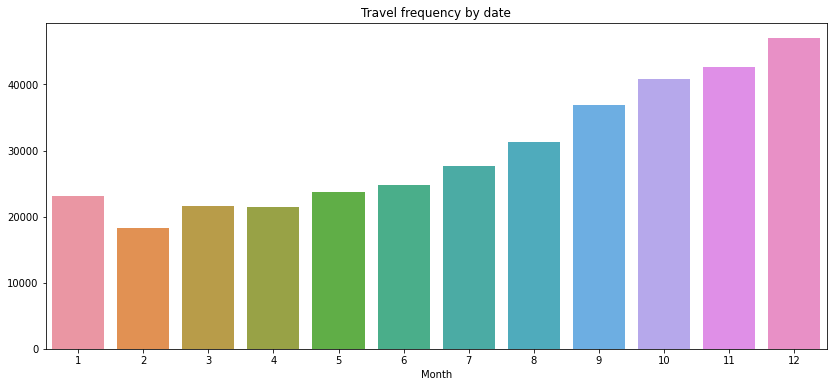

In [22]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot2.index,y=plot2.values)
plt.title('Travel frequency by date')
plt.show()
